In [ ]:
!pip install tensorflow keras #import keras library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd #import pandas for displaying data
import numpy as np  #numpy for numerical computation
df = pd.read_csv("/content/drive/MyDrive/final_project/model.csv") #import csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final_project/model.csv', header=0)   
df = df.reindex(np.random.permutation(df.index))

In [ ]:
Activity = ['PUBCHEM_ACTIVITY_OUTCOME'] #extract activity column from data
df_out = pd.get_dummies(df, columns= Activity, drop_first=True)

In [ ]:
df_out #display data

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,...,PubchemFP709,PubchemFP710,PubchemFP712,PubchemFP714,PubchemFP735,PubchemFP758,PubchemFP777,PubchemFP798,PubchemFP821,PUBCHEM_ACTIVITY_OUTCOME_Inactive
12750,1,0,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9867,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2476,1,1,1,0,1,1,0,1,1,1,...,1,1,0,1,0,0,1,0,0,1
4426,1,1,1,0,1,1,0,1,1,1,...,1,1,0,0,0,0,0,0,0,1
3897,1,1,1,0,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11665,1,1,1,1,1,0,0,1,1,1,...,1,1,1,0,0,0,0,0,0,0
6641,0,0,1,0,0,0,1,1,0,1,...,1,1,0,0,0,0,0,0,0,1
1999,1,1,1,1,1,1,1,0,0,0,...,1,1,0,0,0,1,0,0,1,1
4332,1,0,1,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [ ]:
 #separate data into independent and dependent variables
from sklearn.model_selection import train_test_split
X = df_out.drop(['PUBCHEM_ACTIVITY_OUTCOME_Inactive'], axis=1)
y = df_out['PUBCHEM_ACTIVITY_OUTCOME_Inactive']

In [ ]:
y.value_counts() #shape of dependent variable

0    8000
1    8000
Name: PUBCHEM_ACTIVITY_OUTCOME_Inactive, dtype: int64

In [ ]:
X.to_csv('descriptor_list.csv', index = False) #save data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # split data for training and testing 

In [ ]:
y_test.shape

(1600,)

#https://www.digitalocean.com/community/tutorials/how-to-build-a-deep-learning-model-to-predict-employee-retention-using-keras-and-tensorflow

In [ ]:
#scale tarining data down for better learning and performance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[ 0.88204154,  0.74853127,  0.72787308, ..., -0.46808036,
        -0.39376304, -0.37556086],
       [ 0.88204154,  0.74853127,  0.72787308, ..., -0.46808036,
        -0.39376304, -0.37556086],
       [ 0.88204154, -1.33594954,  0.72787308, ..., -0.46808036,
        -0.39376304, -0.37556086],
       ...,
       [-1.13373345,  0.74853127,  0.72787308, ..., -0.46808036,
        -0.39376304, -0.37556086],
       [-1.13373345,  0.74853127,  0.72787308, ..., -0.46808036,
        -0.39376304, -0.37556086],
       [-1.13373345,  0.74853127,  0.72787308, ..., -0.46808036,
        -0.39376304, -0.37556086]])

In [ ]:
X_train.shape

(14400, 237)

Artificial Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def ANN_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(127, kernel_initializer = "uniform", activation = "relu", input_dim=237))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(127, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))
    classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
    return classifier

In [ ]:
classifier = KerasClassifier(build_fn = ANN_classifier, batch_size=10, nb_epoch=10) # define classifier 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Perform grid search

In [ ]:
classifier = KerasClassifier(build_fn = ANN_classifier)
params = {
    'batch_size':[20,35],
    'epochs':[2,3],
    'optimizer':['adam','rmsprop']
}
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring="accuracy",
                           cv=2)
grid_search = grid_search.fit(X_train, y_train)
ANN = grid_search
best_param = grid_search.best_params_
best_accuracy = grid_search.best_score_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Epoch 1/2
360/360 [==============================] - 3s 5ms/step - loss: 0.1591 - accuracy: 0.9463
Epoch 2/2
360/360 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9781
Epoch 1/2
360/360 [==============================] - 1s 3ms/step - loss: 0.1576 - accuracy: 0.9469
Epoch 2/2
360/360 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9792
Epoch 1/2
360/360 [==============================] - 1s 2ms/step - loss: 0.1614 - accuracy: 0.9460
Epoch 2/2
360/360 [==============================] - 1s 2ms/step - loss: 0.0686 - accuracy: 0.9792
Epoch 1/2
360/360 [==============================] - 1s 3ms/step - loss: 0.1468 - accuracy: 0.9494
Epoch 2/2
360/360 [==============================] - 1s 3ms/step - loss: 0.0639 - accuracy: 0.9812
Epoch 1/3
360/360 [==============================] - 2s 3ms/step - loss: 0.1599 - accuracy: 0.9426
Epoch 2/3
360/360 [==============================] - 1s 3ms/step - loss: 0.0681 - accuracy: 0.9807
Epoch 3/3


In [ ]:
best_param

{'batch_size': 35, 'epochs': 3, 'optimizer': 'adam'}

In [ ]:
best_accuracy

0.9861111111111112

In [ ]:
#Visualise structure of ANN 
!pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;
from graphviz import Source
ann_viz(classifier, title="neural network")

SVM

In [ ]:
from sklearn.svm import SVC  # Importing SVclassifier from sklearn
from sklearn.model_selection import GridSearchCV  #GridSearch for hyperparameter tuning
from sklearn.metrics import classification_report, confusion_matrix   #performance evaluation
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_model = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv= 2) #2folds cross validation
 
# fitting the model for grid search
svm_model.fit(X_train, y_train)

# print best parameter after tuning
print(svm_model.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(svm_model.best_estimator_)

grid_predictions = svm_model.predict(X_test) #make prediction using test set
 
# print classification report
print(classification_report(y_test, grid_predictions))

Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=  37.7s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.807 total time=  27.4s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.878 total time=  26.5s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.874 total time=  27.9s
[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.975 total time=   9.4s
[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.966 total time=   8.5s
[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.945 total time=   9.3s
[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.939 total time=   9.1s
[CV 1/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.874 total time=  21.3s
[CV 2/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.868 total time=  19.3s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.991 total time=  16.4s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;

SVM validation of performance


In [ ]:
#repeat prediction using model
y_pred = svm_model.predict(X_test)

#import necessary evaluation models
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#save performance
model_name = pd.Series(['SVM'], name='Name')
accuracy = pd.Series(acc, name='Accuracy')
precision = pd.Series(prec, name='precision')
recall = pd.Series(recall, name='recall')
f1 = pd.Series(f1, name='f1')

#Display performance
performance_svm = pd.concat([model_name, accuracy, precision, recall, f1], axis=1)
print(performance_svm)

# Display confusion matrix
target_names = ['Active', 'Inactive']
print(classification_report(y_test, y_pred, target_names=target_names))
cf_matrix=confusion_matrix(y_pred, y_test)
cf_matrix

  Name  Accuracy  precision    recall        f1
0  SVM  0.991875   0.992647  0.991432  0.992039
              precision    recall  f1-score   support

      Active       0.99      0.99      0.99       783
    Inactive       0.99      0.99      0.99       817

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



array([[777,   7],
       [  6, 810]])

MCC for SVC

In [ ]:
from sklearn.metrics import matthews_corrcoef #import mattew correlation coefficient 

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)


model_name = pd.Series(['SVC'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
accuracy_svm = pd.Series(acc, name='Gridsearchcv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics_svm = pd.concat([model_name, mcc_train_series, accuracy_svm, mcc_test_series], axis=1)
performance_metrics_svm


,Name,MCC_train,Gridsearchcv,MCC_test
0,SVC,0.999445,0.991875,0.983744


XGBOOST


In [ ]:
from xgboost import XGBClassifier

param = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'gamma':[i/10.0 for i in range(0,5)],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

xgb_model = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140,
 min_child_weight=1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param, scoring='roc_auc',n_jobs=4, cv=2)

# fitting the model for grid search
xgb_model.fit(X_train,y_train)

# print best parameter after tuning
print(xgb_model.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(xgb_model.best_estimator_)

grid_predictions = xgb_model.predict(X_test) #make prediction using test set
 
# print classification report
print(classification_report(y_test, grid_predictions))

{'gamma': 0.0, 'max_depth': 7, 'min_child_weight': 1, 'reg_alpha': 0.1}
XGBClassifier(colsample_bytree=0.8, gamma=0.0, max_depth=7, n_estimators=140,
              nthread=4, reg_alpha=0.1, seed=27, subsample=0.8)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       783
           1       0.99      0.99      0.99       817

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



XGBOOST Performance Validation

In [ ]:
#repeat prediction using model
y_pred = xgb_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#save performance
model_name = pd.Series(['xgb'], name='Name')
accuracy = pd.Series(acc, name='Accuracy')
precision = pd.Series(prec, name='precision')
recall = pd.Series(recall, name='recall')
f1 = pd.Series(f1, name='f1')

#Display performance
performance_xgb = pd.concat([model_name, accuracy, precision, recall, f1], axis=1)
print(performance_xgb)

# Display confusion matrix
target_names = ['Active', 'Inactive']
print(classification_report(y_test, y_pred, target_names=target_names))
cf_matrix=confusion_matrix(y_pred, y_test)
cf_matrix

  Name  Accuracy  precision    recall        f1
0  xgb   0.98875   0.992602  0.985312  0.988943
              precision    recall  f1-score   support

      Active       0.98      0.99      0.99       783
    Inactive       0.99      0.99      0.99       817

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



array([[777,  12],
       [  6, 805]])

MCC FOR XGBOOST

In [ ]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)


model_name = pd.Series(['xgb'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
accuracy_xgb = pd.Series(acc, name='Gridsearchcv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics_xgb = pd.concat([model_name, mcc_train_series, accuracy_xgb, mcc_test_series], axis=1)
performance_metrics_xgb


,Name,MCC_train,Gridsearchcv,MCC_test
0,xgb,0.997918,0.98875,0.977521


Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier # random forest classifier
#hyperparameter tuning
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}
RF_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 2)
RF_model.fit(X_train, y_train) # fit training data to model


# print best parameter after tuning
print(RF_model.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(RF_model.best_estimator_)

grid_predictions = RF_model.predict(X_test) #make prediction using test set
 
# print classification report
print(classification_report(y_test, grid_predictions))

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300, 'random_state': 18}
RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=300, random_state=18)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       783
           1       0.99      0.97      0.98       817

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



Random forest performance evaluation

In [ ]:
y_pred = RF_model.predict(X_test) # make prediction on test set

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#save performance
model_name = pd.Series(['Random forest'], name='Name')
accuracy = pd.Series(acc, name='Accuracy')
precision = pd.Series(prec, name='precision')
recall = pd.Series(recall, name='recall')
f1 = pd.Series(f1, name='f1')

#Display performance
performance_RF = pd.concat([model_name, accuracy, precision, recall, f1], axis=1)
print(performance_RF)

# Display confusion matrix
target_names = ['Active', 'Inactive']
print(classification_report(y_test, y_pred, target_names=target_names))
cf_matrix=confusion_matrix(y_pred, y_test)
cf_matrix

            Name  Accuracy  precision    recall        f1
0  Random forest   0.97875   0.987547  0.970624  0.979012
              precision    recall  f1-score   support

      Active       0.97      0.99      0.98       783
    Inactive       0.99      0.97      0.98       817

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



array([[773,  24],
       [ 10, 793]])

MCC FOR Random Forest

In [ ]:

y_train_pred = RF_model.predict(X_train)
y_test_pred = RF_model.predict(X_test)
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)


model_name = pd.Series(['Random Forest'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
accuracy_RF = pd.Series(acc, name='Gridsearchcv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics_RF = pd.concat([model_name, mcc_train_series, accuracy_RF, mcc_test_series], axis=1)
performance_metrics_RF


,Name,MCC_train,Gridsearchcv,MCC_test
0,Random Forest,0.959761,0.97875,0.957643


Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression #import logistic regression model from sklearn

#tune hyperparameter
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

logistic_model = GridSearchCV(estimator = LogisticRegression(),  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           verbose=0)

logistic_model.fit(X_train, y_train)

# print best parameter after tuning
print(logistic_model.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(logistic_model.best_estimator_)

grid_predictions = logistic_model.predict(X_test) #make prediction using test set
 
# print classification report
print(classification_report(y_test, grid_predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 10}
LogisticRegression(C=10)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       783
           1       0.99      0.97      0.98       817

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred = RF_model.predict(X_test) # make prediction on test set

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

#save performance
model_name = pd.Series(['Logistic Regression'], name='Name')
accuracy = pd.Series(acc, name='Accuracy')
precision = pd.Series(prec, name='precision')
recall = pd.Series(recall, name='recall')
f1 = pd.Series(f1, name='f1')

#Display performance
performance_LG = pd.concat([model_name, accuracy, precision, recall, f1], axis=1)
print(performance_LG)

# Display confusion matrix
target_names = ['Active', 'Inactive']
print(classification_report(y_test, y_pred, target_names=target_names))
cf_matrix=confusion_matrix(y_pred, y_test)
cf_matrix

                  Name  Accuracy  precision    recall        f1
0  Logistic Regression   0.97875   0.987547  0.970624  0.979012
              precision    recall  f1-score   support

      Active       0.97      0.99      0.98       783
    Inactive       0.99      0.97      0.98       817

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



array([[773,  24],
       [ 10, 793]])

In [ ]:
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)
mcc_train = matthews_corrcoef(y_train, y_train_pred)
mcc_test = matthews_corrcoef(y_test, y_test_pred)

model_name = pd.Series(['Random Forest'], name='Name')
mcc_train_series = pd.Series(mcc_train, name='MCC_train')
accuracy_LG = pd.Series(acc, name='Gridsearchcv')
mcc_test_series = pd.Series(mcc_test, name='MCC_test')

performance_metrics_LG = pd.concat([model_name, mcc_train_series, accuracy_LG, mcc_test_series], axis=1)
performance_metrics_LG

,Name,MCC_train,Gridsearchcv,MCC_test
0,Random Forest,0.966408,0.97875,0.955302


Display final result of all models using pandas list


In [ ]:
result =[performance_LG, performance_RF, performance_svm, performance_xgb]
output_perf = pd.concat(result)
output_perf

,Name,Accuracy,precision,recall,f1
0,Logistic Regression,0.978750,0.987547,0.970624,0.979012
0,Random forest,0.978750,0.987547,0.970624,0.979012
0,SVM,0.991875,0.992647,0.991432,0.992039
0,xgb,0.988750,0.992602,0.985312,0.988943


In [ ]:
result =[performance_metrics_svm, performance_metrics_svm, performance_metrics_svm, performance_metrics_xgb]
output_perf_MCC = pd.concat(result)
output_perf_MCC

,Name,MCC_train,Gridsearchcv,MCC_test
0,SVC,0.999445,0.991875,0.983744
0,SVC,0.999445,0.991875,0.983744
0,SVC,0.999445,0.991875,0.983744
0,xgb,0.997918,0.988750,0.977521


Save models as pickle for API

In [ ]:
#SAVE MODEL
import pickle
pickle.dump(RF_model, open('/content/drive/MyDrive/final_project/RF_model.pkl', 'wb'))
pickle.dump(logistic_model, open('/content/drive/MyDrive/final_project/logic_model.pkl', 'wb'))
pickle.dump(svm_model, open('/content/drive/MyDrive/final_project/svm_model.pkl', 'wb'))

Make some predictions 

In [ ]:
# Compare descriptor inputs
load_desc = pd.read_csv('PubChem.csv')
    # read descriptors
Xlist = list(pd.read_csv("model.csv").columns)

subset = load_desc[np.intersect1d(load_desc.columns, Xlist)]
subset

In [ ]:
from sklearn.preprocessing import StandardScaler #scale input data
sc = StandardScaler()
desc_subset = sc.fit_transform(subset)
desc_subset

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
res = RF_model.predict(desc_subset) #USE Random forest for prediction
res

array([[1]], dtype=uint8)

ROC SCORE AND CURVE

In [ ]:
from sklearn.datasets import make_classification
import numpy as np

In [ ]:
logistic_probs = logistic_model.predict_proba(X_test)[::,1]
RF_probs = RF_model.predict_proba(X_test)[::,1]
xgb_probs = xgb_model.predict_proba(X_test)[::,1]
#svm_probs = svm_model.predict_proba(X_test)[::,1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score #import model 

In [ ]:
logistic_auc = roc_auc_score(y_test, logistic_probs)
RF_auc = roc_auc_score(y_test, RF_probs)
#svm_auc = roc_auc_score(y_test, svm_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

In [ ]:
print('logistic: AUROC = %.3f' % (logistic_auc))
print('RF: AUROC = %.3f' % (RF_auc))
#print('svm: AUROC = %.3f' % (svm_auc))
print('svm: AUROC = %.3f' % (xgb_auc))

logistic: AUROC = 0.988
RF: AUROC = 0.995
svm: AUROC = 0.997


In [ ]:
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)
#svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

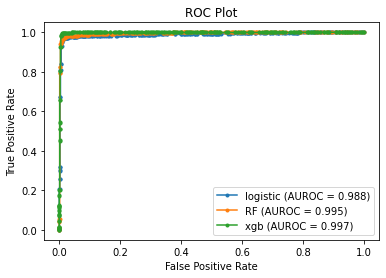

In [ ]:
import matplotlib.pyplot as plt
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='logistic (AUROC = %0.3f)' % logistic_auc)
plt.plot(RF_fpr, RF_tpr, marker='.', label='RF (AUROC = %0.3f)' % RF_auc)
#plt.plot(svm_fpr, svm_tpr, marker='.', label='svm (AUROC = %0.3f)' % svm_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='xgb (AUROC = %0.3f)' % xgb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()